<a href="https://colab.research.google.com/github/PatelDev14/Fruits-and-Vegetable-Recognition/blob/main/training_fruits_veggies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing DataSet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing some libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing
Validation Data is used for model training.
Test Data is used for model testing

##Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veggies_Recoginition/train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veggies_Recoginition/validation',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


##Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
#cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #Output Layer, we are 36 here because we have 36 classes

##Compiling and Training Phase

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #Because we have more thann 2 classes so we use categorical

In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

##Saving Model

In [ ]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 32)

Epoch 1/32
98/98 [==============================] - 985s 9s/step - loss: 4.6280 - accuracy: 0.0404 - val_loss: 3.3745 - val_accuracy: 0.0855
Epoch 2/32
98/98 [==============================] - 173s 2s/step - loss: 3.3854 - accuracy: 0.0709 - val_loss: 3.0786 - val_accuracy: 0.1852
Epoch 3/32
98/98 [==============================] - 169s 2s/step - loss: 3.1488 - accuracy: 0.1191 - val_loss: 2.6284 - val_accuracy: 0.2877
Epoch 4/32
98/98 [==============================] - 176s 2s/step - loss: 2.8515 - accuracy: 0.2151 - val_loss: 2.1309 - val_accuracy: 0.4900
Epoch 5/32
98/98 [==============================] - 171s 2s/step - loss: 2.3238 - accuracy: 0.3512 - val_loss: 1.7412 - val_accuracy: 0.6011
Epoch 6/32
98/98 [==============================] - 176s 2s/step - loss: 1.7975 - accuracy: 0.5018 - val_loss: 0.9408 - val_accuracy: 0.7721
Epoch 7/32
98/98 [==============================] - 172s 2s/step - loss: 1.3704 - accuracy: 0.6135 - val_loss: 0.8259 - val_accuracy: 0.8063
Epoch 8/32
98

In [ ]:
cnn.save('/Users/parth/Desktop/project/trained_model.h5')

In [ ]:
training_history.history #Return the dictionary f history

{'loss': [4.627966403961182,
  3.3853750228881836,
  3.1488001346588135,
  2.8514702320098877,
  2.323761463165283,
  1.7975411415100098,
  1.370442271232605,
  1.094144582748413,
  0.7904374599456787,
  0.7610798478126526,
  0.5490778684616089,
  0.44296887516975403,
  0.3592101037502289,
  0.324900358915329,
  0.31699424982070923,
  0.24952955543994904,
  0.3401203751564026,
  0.23611553013324738,
  0.25436875224113464,
  0.27815741300582886,
  0.1498209536075592,
  0.171413391828537,
  0.11536619067192078,
  0.13925178349018097,
  0.17288371920585632,
  0.127018004655838,
  0.1297171413898468,
  0.12258739769458771,
  0.13244593143463135,
  0.14092478156089783,
  0.11834289878606796,
  0.20845414698123932],
 'accuracy': [0.040449436753988266,
  0.07094702869653702,
  0.11910112202167511,
  0.21508827805519104,
  0.3512038588523865,
  0.5017656683921814,
  0.6134831309318542,
  0.7001605033874512,
  0.7765650153160095,
  0.7951846122741699,
  0.8513643741607666,
  0.8818619847297668,

##Recoding History

In [ ]:
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history, f)

In [ ]:
training_history.history.keys() #Keys of history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
print("Validation set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


##Accuracy Visualization
###Training Visualization

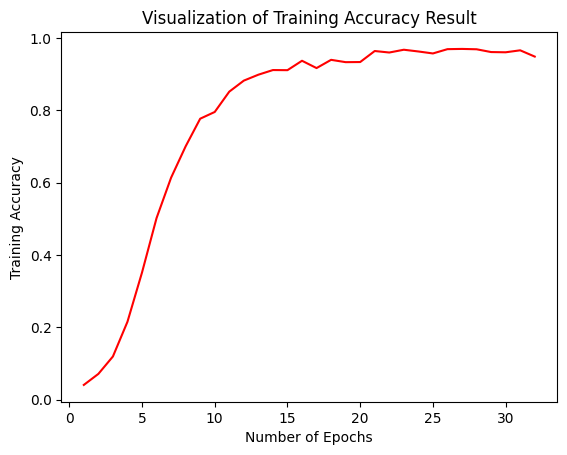

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

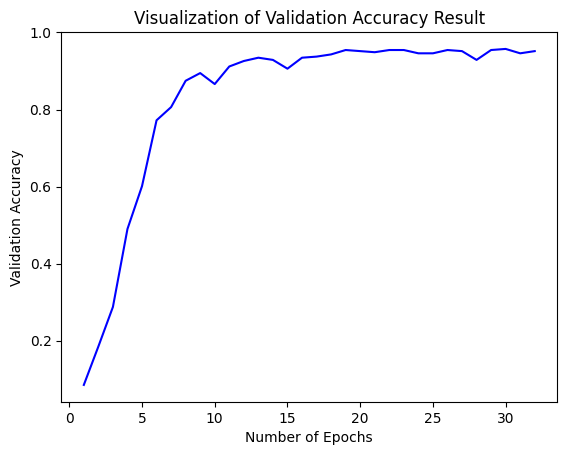

In [ ]:
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()